In [1]:
import pandas as pd
data = pd.read_csv('Downloads/yellow_tripdata_2016-01.csv')

In [2]:
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2016-01-01 00:00:00,2016-01-01 00:00:00,2,1.10,-73.990372,40.734695,1,N,-73.981842,40.732407,2,7.5,0.5,0.5,0.0,0.0,0.3,8.8
1,2,2016-01-01 00:00:00,2016-01-01 00:00:00,5,4.90,-73.980782,40.729912,1,N,-73.944473,40.716679,1,18.0,0.5,0.5,0.0,0.0,0.3,19.3
2,2,2016-01-01 00:00:00,2016-01-01 00:00:00,1,10.54,-73.984550,40.679565,1,N,-73.950272,40.788925,1,33.0,0.5,0.5,0.0,0.0,0.3,34.3
3,2,2016-01-01 00:00:00,2016-01-01 00:00:00,1,4.75,-73.993469,40.718990,1,N,-73.962242,40.657333,2,16.5,0.0,0.5,0.0,0.0,0.3,17.3
4,2,2016-01-01 00:00:00,2016-01-01 00:00:00,3,1.76,-73.960625,40.781330,1,N,-73.977264,40.758514,2,8.0,0.0,0.5,0.0,0.0,0.3,8.8


In [27]:
data.iloc[0]

VendorID                                   2
tpep_pickup_datetime     2016-01-01 00:00:00
tpep_dropoff_datetime    2016-01-01 00:00:00
passenger_count                            2
trip_distance                            1.1
pickup_longitude                    -73.9904
pickup_latitude                      40.7347
RatecodeID                                 1
store_and_fwd_flag                         N
dropoff_longitude                   -73.9818
dropoff_latitude                     40.7324
payment_type                               2
fare_amount                              7.5
extra                                    0.5
mta_tax                                  0.5
tip_amount                                 0
tolls_amount                               0
improvement_surcharge                    0.3
total_amount                             8.8
Name: 0, dtype: object

In [29]:
data_sample = data.sample(frac= 0.001, random_state=1)

In [32]:
hour_start = []
hour_end = []

for index in range(len(data_sample)):
    hour_start += [int(data_sample['tpep_pickup_datetime'].iloc[index].split()[1].split(':')[0])]
    hour_end += [int(data_sample['tpep_dropoff_datetime'].iloc[index].split()[1].split(':')[0])]

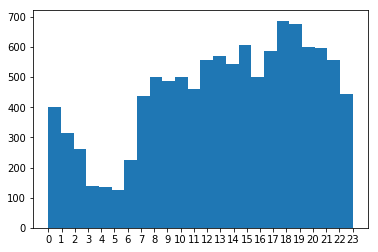

In [33]:
import numpy as np  
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(hour_start, bins = 24)
plt.xticks(np.arange(0,24))
plt.show()

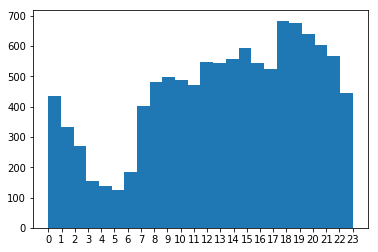

In [34]:
plt.hist(hour_end, bins = 24)
plt.xticks(np.arange(0,24))
plt.show()

In [41]:
import datetime
day_start = []
day_end = []

for index in range(len(data_sample)):
    temp = [int(d) for d in data_sample['tpep_pickup_datetime'].iloc[index].split()[0].split('-')]
    day_start += [datetime.date(temp[0], temp[1], temp[2]).isoweekday()]
    temp = [int(d) for d in data_sample['tpep_dropoff_datetime'].iloc[index].split()[0].split('-')]
    day_end += [datetime.date(temp[0], temp[1], temp[2]).isoweekday()]

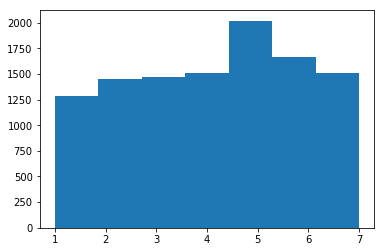

In [43]:
plt.hist(day_start, bins = 7)
plt.xticks(np.arange(1,8))
plt.show()

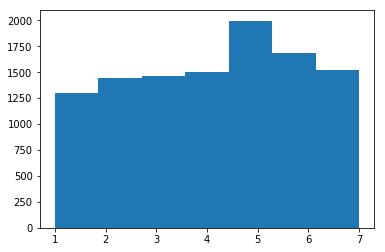

In [44]:
plt.hist(day_end, bins = 7)
plt.xticks(np.arange(1,8))
plt.show()

In [48]:
def time_sim_index(index_1, index_2):
    
    hour_start_1 = int(data_sample['tpep_pickup_datetime'].iloc[index_1].split()[1].split(':')[0])
    hour_end_1 = int(data_sample['tpep_dropoff_datetime'].iloc[index_1].split()[1].split(':')[0])
    hour_start_2 = int(data_sample['tpep_pickup_datetime'].iloc[index_2].split()[1].split(':')[0])
    hour_end_2 = int(data_sample['tpep_dropoff_datetime'].iloc[index_2].split()[1].split(':')[0])
    
    hour_index = min(abs(hour_start_1 - hour_start_2), 24 - (hour_start_1 - hour_start_2)) +\
                 min(abs(hour_end_1 - hour_end_2), 24 - (hour_end_1 - hour_end_2))
        
    temp = [int(d) for d in data_sample['tpep_pickup_datetime'].iloc[index_1].split()[0].split('-')]
    day_start_1 = datetime.date(temp[0], temp[1], temp[2]).isoweekday()
    temp = [int(d) for d in data_sample['tpep_dropoff_datetime'].iloc[index_1].split()[0].split('-')]
    day_end_1 = datetime.date(temp[0], temp[1], temp[2]).isoweekday()
    
    temp = [int(d) for d in data_sample['tpep_pickup_datetime'].iloc[index_2].split()[0].split('-')]
    day_start_2 = datetime.date(temp[0], temp[1], temp[2]).isoweekday()
    temp = [int(d) for d in data_sample['tpep_dropoff_datetime'].iloc[index_2].split()[0].split('-')]
    day_end_2 = datetime.date(temp[0], temp[1], temp[2]).isoweekday()
    
    day_index = abs(day_start_1 - day_start_2) + abs(day_end_1 - day_end_2)
        
    return hour_index/12 + day_index/7

In [49]:
time_sim_index(1, 2)

1.226190476190476